In [1]:
import numpy as np

In [2]:
import seaborn as sns
sns.set()

In [3]:
import pandas as pd

In [4]:
figdict ={"dimx": 400,"dimy": 200}
figdict["dimx"]

400

In [5]:
#jimmy
rawdata = {'person': ['dummy'], 'activityid':[0], 'start': [0], 'duration' : [0]}
ganttdata_df = pd.DataFrame(data=rawdata)
ganttdata_df

xranges = np.array([(110, 30)])
new_row = {'person':'jimmy', 'activityid':1, 'start':110, 'duration':30}
ganttdata_df = ganttdata_df.append(new_row, ignore_index=True)

xranges = np.array([(150, 10)])
new_row = {'person':'jimmy', 'activityid':2, 'start':150, 'duration':10}
ganttdata_df = ganttdata_df.append(new_row, ignore_index=True)

xranges = np.array([(100, 20)])
new_row = {'person':'billy', 'activityid':3, 'start':100, 'duration':20}
ganttdata_df = ganttdata_df.append(new_row, ignore_index=True)

xranges = np.array([(130, 10)])
new_row = {'person':'billy', 'activityid':4, 'start':130, 'duration':10}
ganttdata_df = ganttdata_df.append(new_row, ignore_index=True)

xranges = np.array([(150, 10)])
new_row = {'person':'billy', 'activityid':5, 'start':150, 'duration':10}
ganttdata_df = ganttdata_df.append(new_row, ignore_index=True)

new_row = {'person':'andy', 'activityid':6, 'start':20, 'duration':3}
#append row to the dataframe
ganttdata_df = ganttdata_df.append(new_row, ignore_index=True)
ganttdata_df

,person,activityid,start,duration
0,dummy,0,0,0
1,jimmy,1,110,30
2,jimmy,2,150,10
3,billy,3,100,20
4,billy,4,130,10
5,billy,5,150,10
6,andy,6,20,3


In [6]:
people = ganttdata_df.person.unique().tolist()
people

['dummy', 'jimmy', 'billy', 'andy']

In [7]:
numberofpeople = len(people)
current_palette = sns.color_palette(None,numberofpeople+2)
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)]

In [8]:
bargap = 4

In [9]:
step = figdict["dimy"]/numberofpeople
step = int(step)
step

50

In [10]:
ticklocations = range(int(step/2),figdict["dimy"],step)
ticklocations = list(ticklocations)
ticklocations

[25, 75, 125, 175]

In [11]:
barlocations = range(0,figdict["dimy"],step)
barlocations = list(barlocations)
barlocations

[0, 50, 100, 150]

In [12]:
people_df = pd.DataFrame(data=people)
people_df.columns = ['people']
barlocations_df = pd.DataFrame(data=barlocations)
barlocations_df.columns = ['barlocation']
wherebar_df = pd.concat([people_df, barlocations_df], axis=1)
wherebar_df['color'] = wherebar_df.index
wherebar_df

,people,barlocation,color
0,dummy,0,0
1,jimmy,50,1
2,billy,100,2
3,andy,150,3


In [13]:
def getbarlocation(person_in):    
    barloc = wherebar_df.loc[wherebar_df['people'] == person_in]['barlocation'].tolist()
    return barloc[0]
def getbarcolor(person_in):    
    barcolor = wherebar_df.loc[wherebar_df['people'] == person_in]['color'].tolist()
    return barcolor[0]
#a = getbarcolor('andy')

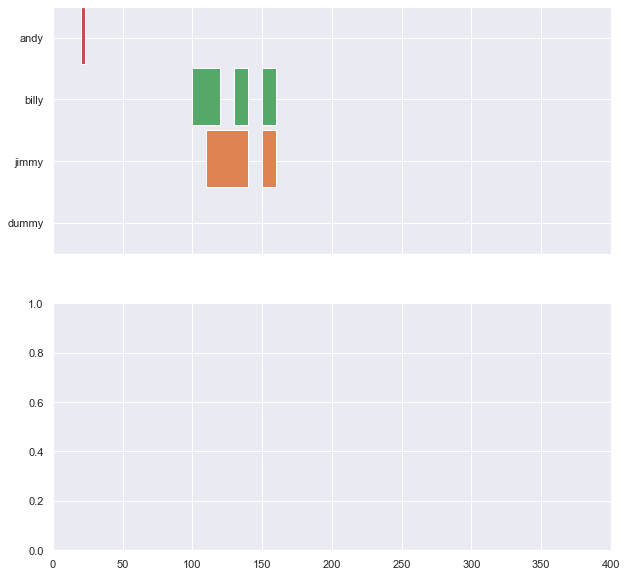

In [14]:
import matplotlib.pyplot as plt 

def addbar2(xranges_in,yranges_in,facecolor_in):
        axs[0].broken_barh(xranges_in, yranges_in, facecolors=facecolor_in)#, label='label') 
# Declaring a figure "gnt" 
figs, axs = plt.subplots(2,1,figsize=(10,10),sharex=True) 
# Setting Y-axis limits 
axs[0].set_ylim(0, figdict["dimy"]) 
  
# Setting X-axis limits 
axs[0].set_xlim(0, figdict["dimx"]) 
  
# Setting ticks on y-axis 
axs[0].set_yticks(ticklocations) 
# Labelling tickes of y-axis 
axs[0].set_yticklabels(people) 
  
# Setting graph attribute 
axs[0].grid(True) 

# Declaring a bar in schedule 
#gnt.broken_barh(ganttdata)
for index, row in ganttdata_df.iterrows():
    #print(row['person'], row['activityid'], row['start'],row['duration'])
    xranges = np.array([(row['start'], row['duration'])])
    barlocation = getbarlocation(row['person'])
    yranges = np.array((barlocation+bargap, step-bargap))
    barcolor = getbarcolor(row['person'])
    facecolor = current_palette[barcolor]
    addbar2(xranges,yranges,facecolor)

#gnt.legend() 